# **Data Analysis**

In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc
import statsmodels.api as sm
pd.set_option('max_columns', 100)

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

### Data Structure: (supervised learning)


+ each row is a **sample**/record, ex: a customer
+ each column is an input variable/attribute/**feature**/predictor, ex: FICO score of a customer
  + with the exception of one column being the output **target**/label /prediction/"dependent variable"


**NumPy** | **pandas**: Support Data Wrangling 



**Load Data:**

In [ ]:
# load the LendingClub dataset
loan= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_data.csv')

#View First 25 Records
loan.head(25)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


**#EXPLARATORY DATA ANALYSIS**


In [ ]:
#load necessary packages
import numpy as np
import pandas as pd

#restructure data
pd.set_option('max_columns', 100)

In [ ]:
# How large is the dataset?
loan.shape

(9578, 14)

In [ ]:
# Any missing data?
loan.isnull().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [ ]:
#  Remove rows with no purpose information 
# loan=loan[loan['purpose'].notna()]
# loan.purpose(4) 

In [ ]:
#Summary Statistics.
loan.agg(['mean','std','skew','median','max'])

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
skew,-1.539621,NaN,0.164420,0.912522,0.028668,0.023941,0.471260,1.155748,1.116106e+01,0.059985,3.584151,6.061793,5.126434,1.854592
median,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
max,1.000000,small_business,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loan.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
loan.installment.max()

940.14

In [ ]:
loan.delinq_2yrs.sum()

1568

In [ ]:
# Retrieve multiple values: 1st, 2nd and 5th.
loan.iloc[[0,1,4]]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loan.rank()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,5723.5,5572.0,4208.0,9314.5,7428.0,7758.5,7192.0,7056.0,8295.5,5385.0,1819.0,4229.5,4510.0,4023.0
1,5723.5,2962.5,2593.5,3959.5,5816.5,5534.5,4915.5,2308.0,8549.0,7694.5,1819.0,4229.5,4510.0,4023.0
2,5723.5,5572.0,6670.5,6460.0,1548.5,4337.0,2431.5,5765.0,2574.5,2707.0,4868.5,4229.5,4510.0,4023.0
3,5723.5,5572.0,2221.0,2346.0,7428.0,2738.5,5335.0,2211.5,8552.0,7403.0,4868.5,4229.5,4510.0,4023.0
4,5723.5,2962.5,7455.5,1209.5,7197.0,5857.5,1122.5,4648.0,3191.0,4078.5,1819.0,8874.5,4510.0,4023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,934.5,1166.0,7803.0,6236.5,9333.5,3788.5,1539.0,9293.0,9532.0,8172.0,6791.5,4229.5,4510.0,8812.0
9574,934.5,1166.0,5103.5,4542.0,6138.5,131.5,6150.5,5204.5,536.0,478.5,8961.5,4229.5,4510.0,8812.0
9575,934.5,5572.0,2593.5,1030.0,2640.5,4966.0,2973.5,3491.5,5317.0,8253.0,9401.5,4229.5,4510.0,8812.0
9576,934.5,8208.0,8819.5,6350.5,4004.5,7644.5,3496.5,968.0,161.0,671.5,8961.5,4229.5,4510.0,8812.0


In [ ]:
# total distinct purposes in dataset
loan.groupby('purpose').count()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
purpose,,,,,,,,,,,,,
all_other,2331,2331,2331,2331,2331,2331,2331,2331,2331,2331,2331,2331,2331
credit_card,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262,1262
debt_consolidation,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957
educational,343,343,343,343,343,343,343,343,343,343,343,343,343
home_improvement,629,629,629,629,629,629,629,629,629,629,629,629,629
major_purchase,437,437,437,437,437,437,437,437,437,437,437,437,437
small_business,619,619,619,619,619,619,619,619,619,619,619,619,619


In [ ]:
cp = loan.groupby(by='credit_policy')
cp.head()


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1


In [ ]:
#average interest rate by policy
loan.groupby(by='credit_policy')['int_rate'].mean()

credit_policy
0    0.138680
1    0.118754
Name: int_rate, dtype: float64

In [ ]:
loan[loan.credit_policy==0].groupby(loan.purpose).sum()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
purpose,,,,,,,,,,,,,
all_other,0,65.4644,107677.03,5345.907340,5969.95,341352,1.866881e+06,11770483,23318.74,1962,138,31,145
credit_card,0,33.4094,70621.23,2674.475673,3714.85,164824,1.080018e+06,9739306,14504.60,832,46,29,51
debt_consolidation,0,104.6295,235642.85,7979.277549,11490.37,497908,3.045709e+06,18857996,44148.20,2828,196,79,189
educational,0,12.0786,18283.02,922.355713,1000.63,60558,2.517660e+05,1218724,3873.60,356,17,5,27
home_improvement,0,16.3359,37618.69,1308.717066,1522.04,80799,5.314508e+05,4365711,5236.80,572,16,12,42
major_purchase,0,8.7434,14170.46,699.826540,677.90,45417,1.673319e+05,488179,2299.80,293,21,5,11
small_business,0,18.3922,65864.49,1409.195254,1548.18,86813,6.380398e+05,9175850,5500.60,575,30,9,54


In [ ]:
#how many people have a FICO score  less than 630? One row for each credit policy
loan[loan['fico']<630].groupby(loan.credit_policy).count()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
credit_policy,,,,,,,,,,,,,,
0,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# credit policy = 1 / group by purpose / fnd mean fico
loan[loan.credit_policy==1].groupby('purpose')['fico'].mean()

purpose
all_other             722.678474
credit_card           716.397059
debt_consolidation    709.683835
educational           718.043307
home_improvement      732.625000
major_purchase        728.617251
small_business        724.969697
Name: fico, dtype: float64

In [ ]:
# credit policy = 0 / group by purpose / fnd mean fico
loan[loan.credit_policy==0].groupby('purpose')['fico'].mean()

purpose
all_other             688.209677
credit_card           681.090909
debt_consolidation    678.348774
educational           680.426966
home_improvement      690.589744
major_purchase        688.136364
small_business        700.104839
Name: fico, dtype: float64

In [ ]:
#Differences
L1= loan[loan.credit_policy==1].groupby('purpose')['fico'].mean()
L2= loan[loan.credit_policy==0].groupby('purpose')['fico'].mean()

L1-L2

purpose
all_other             34.468797
credit_card           35.306150
debt_consolidation    31.335061
educational           37.616341
home_improvement      42.035256
major_purchase        40.480887
small_business        24.864858
Name: fico, dtype: float64

In [ ]:
# Creating binary variables 0/1 # 
#L1.loc[L1['purpose']=='all_other','purpose']=0
#L1.loc[L1['purpose']=='credit_card','purpose']=1
#L1.head(7)

**Potential Issues/Data Wrangling Notes:**
 

*   Target classes are heavily unbalanced(oversampling and/or undersampling.
*   Column "purpose" is categorical. Convert to dummies?
*   Input columns are of very different magnitudes. Normalize/standardize them?







* "normalize" --> [0,1] | "standardize" --> mean 0 and std 1.*



**LogisticRegression in scikit-learn package uses L2 regularization **



https://towardsdatascience.com/over-fitting-and-regularization-64d16100f45c

https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c


**# Data Wrangling**

In [ ]:
# Normalize/Standardize some input columns

loan['installment1000'] = loan.installment / 1000
loan.drop('installment', axis=1, inplace=True)

loan['fico_ratio'] = loan.fico / 850
loan.drop('fico', axis=1, inplace=True)

loan['decades_with_cr_line'] = loan.days_with_cr_line / 3650
loan.drop('days_with_cr_line', axis=1, inplace=True)

loan['log_revol_bal'] = np.log(loan.revol_bal + 1)
loan.drop('revol_bal', axis=1, inplace=True)

loan.revol_util = loan.revol_util / 100

In [ ]:
# double check the resulting data
loan.agg(['mean','std','skew'])

,credit_policy,int_rate,log_annual_inc,dti,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,installment1000,fico_ratio,decades_with_cr_line,log_revol_bal
mean,0.804970,0.122640,10.932117,12.606679,0.467992,1.577469,0.163708,0.062122,0.160054,0.319089,0.836290,1.249525,8.612757
std,0.396245,0.026847,0.614813,6.883970,0.290144,2.200245,0.546215,0.262126,0.366676,0.207071,0.044671,0.684091,2.173318
skew,-1.539621,0.164420,0.028668,0.023941,0.059985,3.584151,6.061793,5.126434,1.854592,0.912522,0.471260,1.155748,-2.213951


In [ ]:
loan.int_rate.agg(['max','mean','std'])

max     0.216400
mean    0.122640
std     0.026847
Name: int_rate, dtype: float64

https://scikit-learn.org/stable/modules/preprocessing.html

## Convert column "purpose" to dummies

In [ ]:
# What are the possible values in column "purpose"? 
loan.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
# create the dummies
#loan = pd.get_dummies(loan, columns=['purpose'])
#loan.head()

# drop one of the dummies 
#loan.drop('purpose_debt_consolidation', axis=1, inplace=True)
#loan.head()

In [ ]:
# how many records have not_fully_paid being 0? being 1?
loan.not_fully_paid.value_counts()


0    8045
1    1533
Name: not_fully_paid, dtype: int64

In [ ]:
# What percentage of borrowers default?
loan.not_fully_paid.mean()

0.16005429108373356

### LendingClub Dataset : 

Highly **unbalanced**: the proportions of all possible values (classes) of the target variable are far too different. alogirthms typically default to "majority class" therefor creating bias

There are two solutions when the data is highly unbalanced:
+ **Option 1. Re-sampling the data to make it balanced.** 
  + undersampling the majority class
    + this is the usual choice when we have large enough data
  + oversampling the minority class
    + it may cause the data leakage problem, (avoid unless the data size is too small)
+ **Option 2. Do not use "accuracy" as the performance metric.** Instead, 
  + use alternative metrics that can give different weight to different classes of the target, ex: counts '1' more heavily than '0' in the target of the LendingClub dataset


"Unbalanced"- causes a trained model to completely ignore some possible values of a target

In [ ]:
# separate the classes, where we already know 'not_fully_paid==0' is the majority class
loan_0 = loan[loan.not_fully_paid==0]
loan_1 = loan[loan.not_fully_paid==1]

# remember the sizes of the two classes
n_majority_class = loan_0.shape[0]
n_minority_class = loan_1.shape[0]
print(f"The majority class contains {n_majority_class} records. \nThe minority class contains {n_minority_class} records. ")

The majority class contains 8045 records. 
The minority class contains 1533 records. 


### Undersampling the majority class

The function for this is `sklearn.utils.resample()`.

In [ ]:
from sklearn.utils import resample

In [ ]:
# undersample the majority class
loan_0_undersampled = resample(loan_0, replace=False,
                              n_samples=n_minority_class, random_state=1234)
loan_0_undersampled.shape

(1533, 14)

### Combine the two classes into a single (resampled) train dataset

In [ ]:
loan_balanced = pd.concat([loan_0_undersampled, loan_1])
loan_balanced.not_fully_paid.value_counts()

0    1533
1    1533
Name: not_fully_paid, dtype: int64

In [ ]:
## save the (balanced) train data and the (unbalanced) test data for future use
path = '/content/'
loan_balanced.to_csv(path + 'loan_balanced.csv', index=False)


### Comments: 

make sure you do `train_test_split()` *before* oversampling (why?)
+ Other oversampling methods :
  + [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)), a.k.a. `resample()` with the option `replace=True`.
  + [`imblearn.over_sampling.SMOTE`](https://imbalanced-learn.org/stable/over_sampling.html) -- a k-NN inspired method to create synthetic records

### Split the data into train and test

In [ ]:
X = loan.drop(columns=['purpose'])
y = loan['purpose']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                               test_size=0.25, # reserve 20% data for testing
                               stratify=y, # use stratified sampling
                               random_state=4321)

Now let's see whether and how data wrangling we just did affects the eventual prediction performance. Let's again use logistic regression.

## Logistic regression on the balanced data

In [ ]:
# Step 1: determine the hyperparameter values of algorith
model = LogisticRegression(penalty='none', max_iter=1000, random_state=1)

In [ ]:
# Step 2: feed the train dataset into the learning algorithm to get the trained model (i.e., the algorithm)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000, penalty='none', random_state=1)

In [ ]:
#Coefficients of the trained model:
logit_reg_coef = pd.DataFrame(model.coef_[0],index=X_train.columns,columns=['Coef'])
logit_reg_coef

,Coef
credit_policy,-0.242924
int_rate,-2.803797
log_annual_inc,0.166552
dti,-0.006790
revol_util,0.457215
inq_last_6mths,-0.014427
delinq_2yrs,0.104154
pub_rec,-0.153548
not_fully_paid,0.098575
installment1000,-1.612116


In [ ]:
# evaluation
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

The accuracy is: 46.72%
The confusion matrix is:
[[235   5 333   1   3   0   6]
 [ 42   2 267   0   4   0   1]
 [114   3 870   0   1   0   1]
 [ 33   0  53   0   0   0   0]
 [ 64   1  86   0   3   0   3]
 [ 54   0  53   0   0   0   2]
 [ 39   0 104   0   3   0   9]]


In [ ]:
#import statsmodels.api as sm
#logit_model=sm.Logit(y_train,X_train)
#result=logit_model.fit()
#print(result.summary())

# This gives the probability of the target being 1:
#y_predict_prob = model.predict(X_test)

# Set y_predict at 1 if and only if the above probability is higher than 0.5:
#y_predict = y_predict_prob.apply(lambda x : 1 if x>0.5 else 0)


# **Visualizing**

In [ ]:
# Load Necessary Packagees
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
lb = loan



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


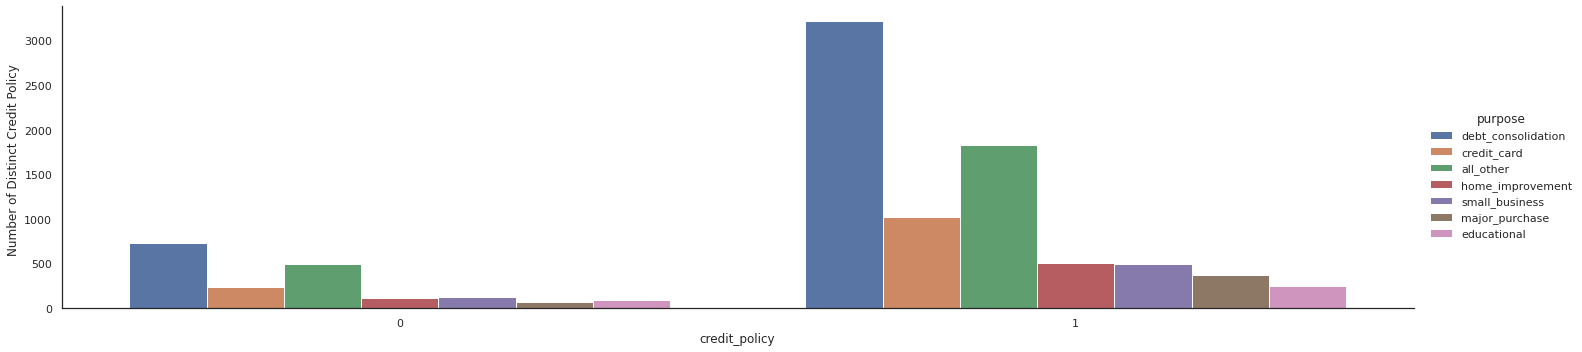

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("credit_policy", data= lb, aspect=4.0, kind='count',
                       hue='purpose', order=range(0, 2))
    g.set_ylabels('Number of Distinct Credit Policy ')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


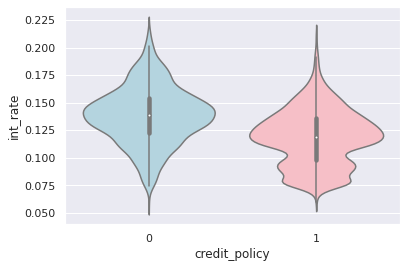

In [ ]:
sns.violinplot("credit_policy", "int_rate", data=lb,
               palette=["lightblue", "lightpink"]);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


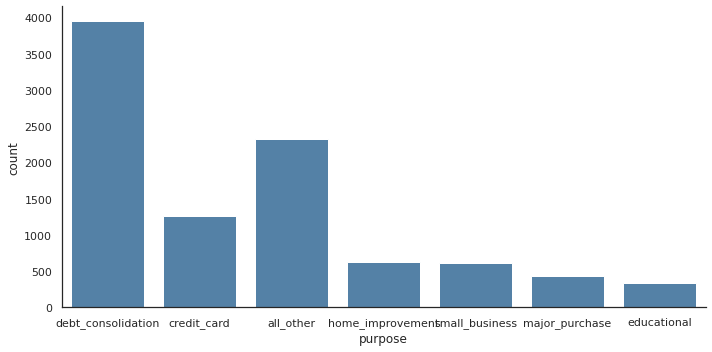

In [ ]:
with sns.axes_style('white'):
  g = sns.factorplot("purpose", data = lb, aspect=2,
                     kind="count", color='steelblue')

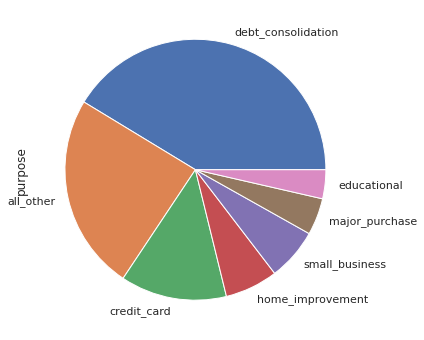

In [ ]:
lb['purpose'].value_counts().plot(kind='pie', figsize=(6,6))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


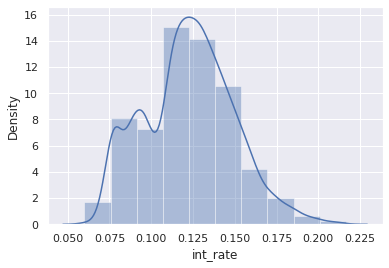

In [ ]:
sns.distplot(lb['int_rate'], bins=10, kde= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


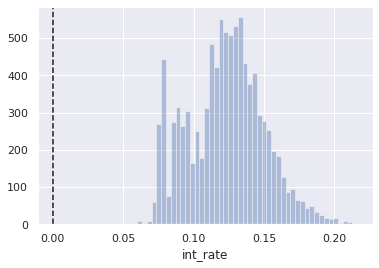

In [ ]:
sns.distplot(lb['int_rate'], kde=False);
plt.axvline(0, color="k", linestyle="--");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


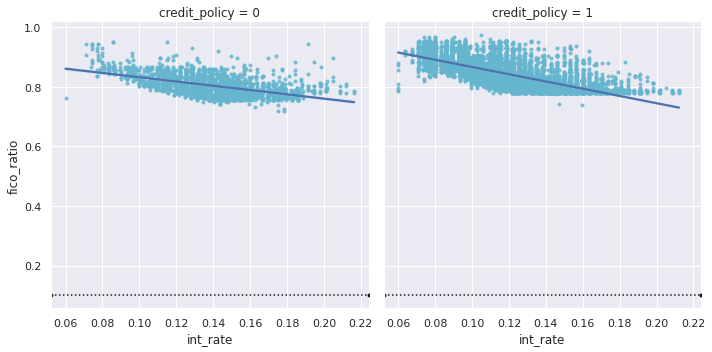

In [ ]:
g = sns.lmplot('int_rate', 'fico_ratio', col='credit_policy', data= lb,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

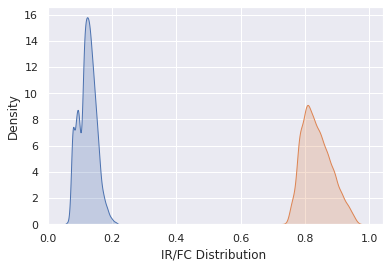

In [ ]:
sns.kdeplot(lb["int_rate"], label='IR', shade=True)
sns.kdeplot(lb["fico_ratio"], label='FC', shade=True)
plt.xlabel('IR/FC Distribution ');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


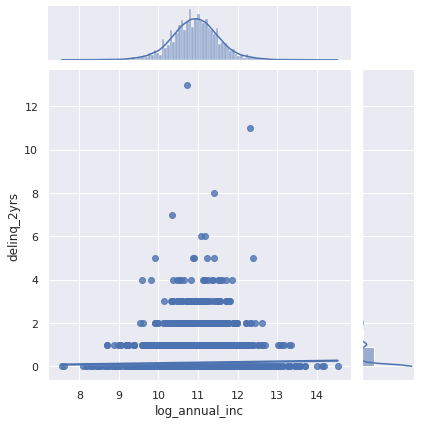

In [ ]:
sns.jointplot("log_annual_inc", "delinq_2yrs", data = lb, kind='reg')

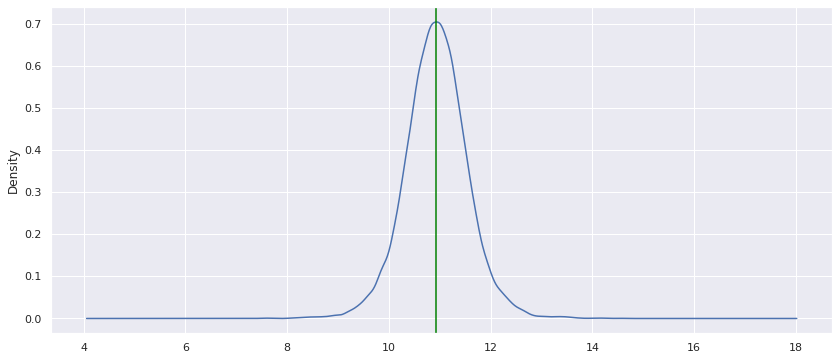

In [ ]:
ax = lb['log_annual_inc'].plot(kind='density', figsize=(14,6)) 
ax.axvline(lb['log_annual_inc'].mean(),color='green')

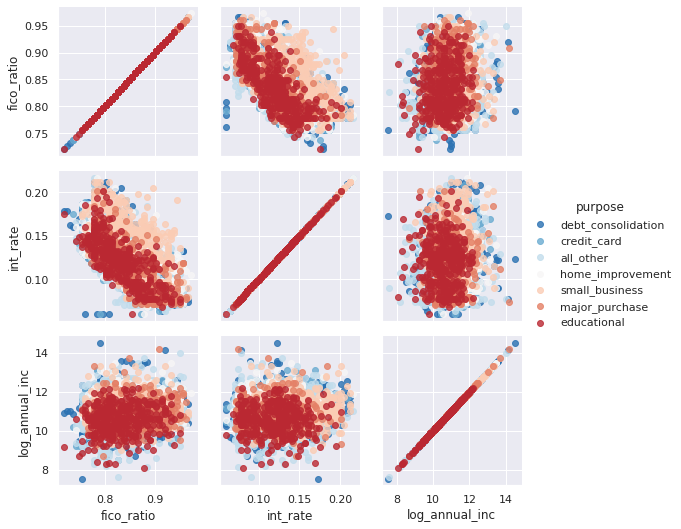

In [ ]:
g = sns.PairGrid(lb, vars=['fico_ratio', 'int_rate', 'log_annual_inc'],
                 hue='purpose', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
corr = lb.corr()
corr

,credit_policy,int_rate,log_annual_inc,dti,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,installment1000,fico_ratio,decades_with_cr_line,log_revol_bal
credit_policy,1.000000,-0.294089,0.034906,-0.090901,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.058770,0.348319,0.099026,0.009084
int_rate,-0.294089,1.000000,0.056383,0.220006,0.464837,0.202780,0.156079,0.098162,0.159552,0.276140,-0.714821,-0.124022,0.116108
log_annual_inc,0.034906,0.056383,1.000000,-0.054065,0.054881,0.029171,0.029203,0.016506,-0.033439,0.448102,0.114576,0.336896,0.315156
dti,-0.090901,0.220006,-0.054065,1.000000,0.337109,0.029189,-0.021792,0.006209,0.037362,0.050202,-0.241191,0.060101,0.320353
revol_util,-0.104095,0.464837,0.054881,0.337109,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.081356,-0.541289,-0.024239,0.498591
inq_last_6mths,-0.535511,0.202780,0.029171,0.029189,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.010419,-0.185293,-0.041736,-0.034092
delinq_2yrs,-0.076318,0.156079,0.029203,-0.021792,-0.042740,0.021245,1.000000,0.009184,0.008881,-0.004368,-0.216340,0.081374,-0.058885
pub_rec,-0.054243,0.098162,0.016506,0.006209,0.066717,0.072673,0.009184,1.000000,0.048634,-0.032760,-0.147592,0.071826,-0.003860
not_fully_paid,-0.158119,0.159552,-0.033439,0.037362,0.082088,0.149452,0.008881,0.048634,1.000000,0.049955,-0.149666,-0.029237,0.007747
installment1000,0.058770,0.276140,0.448102,0.050202,0.081356,-0.010419,-0.004368,-0.032760,0.049955,1.000000,0.086039,0.183297,0.239425


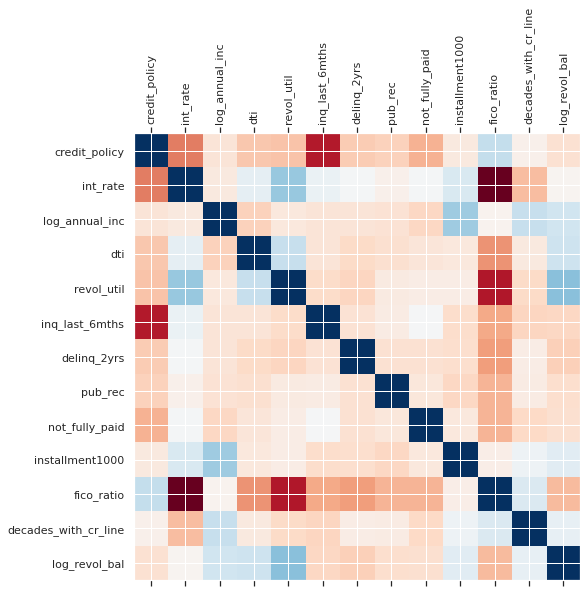

In [ ]:
fig = plt.figure(figsize=(8,8))

plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,
rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

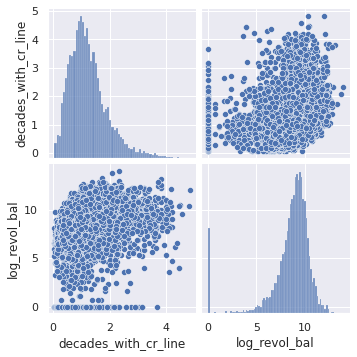

In [ ]:
sns.pairplot(lb.iloc[:, 12:15])

# **Machine Learning:** Supervised Learning thorugh Model Analytics  and other Performance Metrics



+ There are many learning algorithms to choose from
+ For each learning algorithm, there are usually many hyperparameters to set, the choices of which may result in different trained models

**There is no sure choice that dominates all other choices.Try multiple learning algorithms, and multiple possible values of the hyperparameters for each learning algorithm. We then compare them to select the champion model.



In [ ]:
# load necessary Python packages
import numpy as np
import pandas as pd
pd.set_option('max_columns', 100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
## save the (balanced) train data and the (unbalanced) test data for future use
path = '/content/'
loan_balanced.to_csv(path + 'loan_balanced.csv', index=False)

loan_balanced = pd.read_csv('/content/loan_balanced.csv')

# drop one of the dummies 
loan_balanced.drop('purpose', axis=1, inplace=True)

loan_balanced.head()

,credit_policy,int_rate,log_annual_inc,dti,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,installment1000,fico_ratio,decades_with_cr_line,log_revol_bal
0,1,0.1189,10.849415,18.45,0.679,1,0,0,0,0.18241,0.820000,0.936975,9.376956
1,0,0.1380,9.852194,3.85,0.853,0,0,0,0,0.06135,0.802353,0.263002,7.154615
2,1,0.1136,11.728037,13.73,0.597,0,0,0,0,0.79810,0.855294,1.389041,10.248424
3,1,0.1191,10.516861,19.77,0.553,1,0,1,0,0.08791,0.796471,1.249304,9.276128
4,0,0.1600,10.668862,13.12,0.344,2,0,0,0,0.17579,0.802353,0.221929,7.921173


In [ ]:
# Separate the feature matrix and target array. Then, split train and test
X = loan_balanced.drop(columns=['not_fully_paid'])
y = loan_balanced['not_fully_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                               test_size=0.2, # reserve 20% data for testing
                               stratify=y, # use stratified sampling
                               random_state=1)

In [ ]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(penalty='none', max_iter=1000, random_state=1)
model_LR.fit(X_train,y_train)

y_predict = model_LR.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
accuracy_LR = accuracy
cm_LR = cm

The accuracy is: 59.77%
The confusion matrix is:
[[186 121]
 [126 181]]


In [ ]:
#OLS REGRESSION
#https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html

#Add constant because stat model need constant
X_train_addconst = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_addconst)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         not_fully_paid   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     19.24
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           1.42e-40
Time:                        13:28:35   Log-Likelihood:                -1668.7
No. Observations:                2452   AIC:                             3363.
Df Residuals:                    2439   BIC:                             3439.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.5172 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Decision tree model 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=1)
model_DT.fit(X_train,y_train)

y_predict = model_DT.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
accuracy_DT = accuracy
cm_DT = cm

In [ ]:
#Plot Tree
# warning: limit the max_depth before you plot the tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(model_DT,fontsize=10)
plt.show()

In [ ]:
#Random Forrest 

from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=1)
model_RF.fit(X_train,y_train)

y_predict = model_RF.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
accuracy_RF = accuracy
cm_RF = cm

In [ ]:
#RandomForestClassifier tells the relative importance of all input variables:
importances = model_RF.feature_importances_
pd.Series(importances, index=X_train.columns).sort_values(ascending=False)



(https://www.saedsayad.com/k_nearest_neighbors.htm)


In [ ]:
##K-Nearest Neighbor

neighbors=KNeighborsClassifier(n_neighbors=5)
neighbors.fit(X_train,y_train)

y_predict = model_RF.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

## Metrics besides accuracy for comparing the trained models



In [ ]:
loan_balanced


LogisticRegression classifier produces record-by-record binary predictions via its `predict()` method, and produces record-by-record probability estimates via its `predict_proba()` method

In [ ]:
#LR result example: 

y_predict = model_LR.predict(X_test)
y_predict_proba = model_LR.predict_proba(X_test)

record_level_predictions = pd.DataFrame({'y_test':y_test.to_numpy(),
                                         'y_predict':y_predict,
                                         'y_predict_proba':y_predict_proba[:,1]})
record_level_predictions

In [ ]:
#RF result example: 

y_predict = model_RF.predict(X_test)
y_predict_proba = model_RF.predict_proba(X_test)

record_level_predictions = pd.DataFrame({'y_test':y_test.to_numpy(),
                                         'y_predict':y_predict,
                                         'y_predict_proba':y_predict_proba[:,1]})
record_level_predictions

### Accuracy vs Confusion Matrix

Comparing the ground truth, "y_test", with the predicted value, "y_predict"
+ accuracy (number of records where y_test == y_predict) / (total number of records)
+ confusion matrix:

<table>
  <tr>
    <th></th>
    <th>y_predict==0</th>
    <th>y_predict==1</th>
  </tr>
  <tr>
    <th>y_test==0</th>
    <th>number of TN (true negatives)</th>
    <th>number of FP (false positives)</th>
  </tr>
  <tr>
    <th>y_test==1</th>
    <th>number of FN (false negatives)</th>
    <th>number of TP (true positives)</th>
  </tr>
</table>

In [ ]:
cm_DT

In [ ]:
cm_LR

In [ ]:
model_LR

**# roc_auc_score**

"roc" stands for the Receiver Operating Characteristic (ROC) Curve
"auc" stands for "Area Under the ROC Curve"

roc_auc_score(y_test, y_predict_proba) computes the size of the area under the ROC curve. Value between 0.5 and 1. A larger number means better model performance.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, y_predict_proba[:,1])


# **Customized Metric**

Suppose that LendingClub company plans to contact all borrowers predicted to default. The cost of contacting a borrower is \$1. If contacted, and if the borrower indeed planned to default (a.k.a. a true positive, or TP, case), this contact may change the borrower's mind. Suppose that this possible change of mind, on average, can save LendingClub \$6 per case of TP. 

Question: how much money LendingClub can save in the scenario shown in confusion matrix `cm_LR`?

In [ ]:
def my_custom_profit_function(cm):
  return cm[1,1]*5-cm[0,1]*1

In [ ]:
print("The savings from adopting the logistic regression model, the decision tree model, and the random forest model are, respectively:")
print(f"${my_custom_profit_function(cm_LR)}, ${my_custom_profit_function(cm_DT)}, ${my_custom_profit_function(cm_RF)}.")

The savings from adopting the logistic regression model, the decision tree model, and the random forest model are, respectively:
$784, $753, $816.
